## Fruits Classification using CNN

In [1]:
from sklearn.datasets import load_files
import numpy as np
from keras.utils import np_utils
from keras.preprocessing.image import load_img, array_to_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import random as rn

Using TensorFlow backend.


In [2]:
train_loc=("C:/Users/acer/Downloads/fruits/fruits-360/Training")
test_loc=("C:/Users/acer/Downloads/fruits/fruits-360/Test")

In [3]:
def loader(location):
    dataset = load_files(location)
    files = np.array(dataset['filenames'])
    targets = np.array(dataset['target'])
    labels = np.array(dataset['target_names'])
    return files,targets,labels

In [4]:
X_train,y_train,train_labels= loader(train_loc)
X_test,y_test,test_labels= loader(test_loc)

In [5]:
classes = len(np.unique(y_train))
classes

61

In [6]:
y_train = np_utils.to_categorical(y_train,classes)
y_test = np_utils.to_categorical(y_test,classes)

In [7]:
def image_converter(files):
    array_new = []
    for file in files:
        array_new.append(img_to_array(load_img(file)))
    return array_new

In [8]:
X_train = np.array(image_converter(X_train))
X_test = np.array(image_converter(X_test))

In [10]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

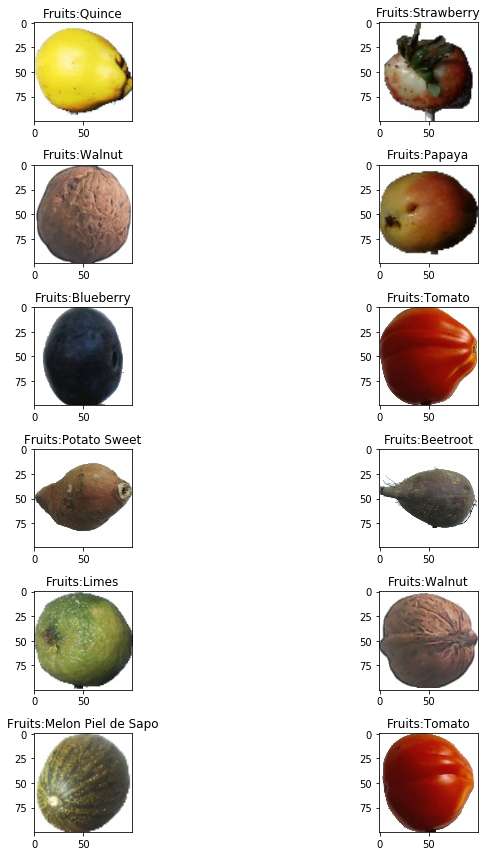

In [20]:
fig,ax=plt.subplots(6,2)
fig.set_size_inches(12,12)
for i in range(6):
    for j in range(2):
        im=rn.randint(0,150)
        ax[i,j].imshow(X_train[im])
        ax[i,j].set_title('Fruits:'+train_labels[np.argmax(y_train[im])])
plt.tight_layout()

In [11]:
X_train.shape

(29484, 100, 100, 3)

In [12]:
y_train.shape

(29484, 61)

In [13]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) 
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(61, activation = "softmax"))

In [14]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(X_train,y_train,batch_size=20,epochs=5,validation_split=0.3)

Train on 20638 samples, validate on 8846 samples
Epoch 1/5
20638/20638 [==============================] - 156s 8ms/sample - loss: 1.3118 - accuracy: 0.6857 - val_loss: 0.1394 - val_accuracy: 0.9721
Epoch 2/5
20638/20638 [==============================] - 149s 7ms/sample - loss: 0.0682 - accuracy: 0.9849 - val_loss: 0.0324 - val_accuracy: 0.9925
Epoch 3/5
20638/20638 [==============================] - 149s 7ms/sample - loss: 0.0337 - accuracy: 0.9924 - val_loss: 0.0851 - val_accuracy: 0.9766
Epoch 4/5
20638/20638 [==============================] - 150s 7ms/sample - loss: 0.0176 - accuracy: 0.9956 - val_loss: 0.0051 - val_accuracy: 0.9995
Epoch 5/5
20638/20638 [==============================] - 150s 7ms/sample - loss: 0.0214 - accuracy: 0.9953 - val_loss: 0.0029 - val_accuracy: 0.9994


In [16]:
acc=model.evaluate(X_test,y_test,verbose=0)

In [17]:
print("Accuracy of model is:",acc[1]*100)

Accuracy of model is: 96.60261273384094


In [18]:
y_pr=model.predict(X_test)

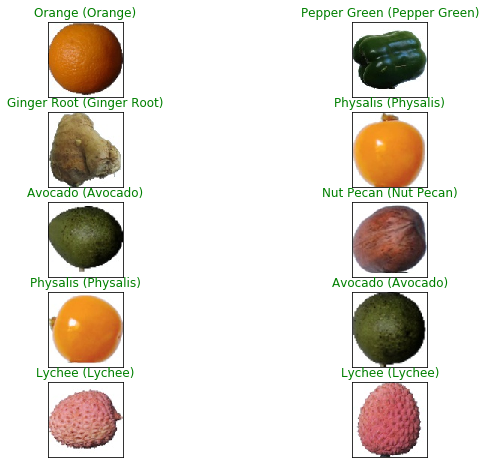

In [19]:
fig = plt.figure(figsize=(10,8))
for i,ip in enumerate(np.random.choice(X_test.shape[0],size=10,replace=False)):
    ax = fig.add_subplot(5,2,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_test[ip]))
    pred=np.argmax(y_pr[ip])
    true=np.argmax(y_test[ip])
    ax.set_title("{} ({})".format(test_labels[pred],test_labels[true]),
                  color=("green" if pred == true else "red"))